In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# leitura da Base de Dados
dados = pd.read_csv('Dados_PRF_2022.csv', sep = ';', encoding = "ISO-8859-1")

# Primeiros Registros
dados.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,405151,2022-01-01,sábado,01:35:00,PI,316.0,415,MARCOLANDIA,Ingestão de álcool pelo condutor,Colisão traseira,...,0,1,0,1,2,"-7,43280012","-40,68261908",SPRF-PI,DEL04-PI,UOP03-DEL04-PI
1,405158,2022-01-01,sábado,02:40:00,PR,116.0,33,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,...,0,0,0,1,1,"-25,114403","-48,8467554",SPRF-PR,DEL01-PR,UOP02-DEL01-PR
2,405172,2022-01-01,sábado,05:22:00,MS,163.0,393,NOVA ALVORADA DO SUL,Condutor deixou de manter distância do veículo...,Colisão traseira,...,0,1,0,1,2,"-21,228445","-54,456296",SPRF-MS,DEL02-MS,UOP01-DEL02-MS
3,405203,2022-01-01,sábado,07:00:00,RJ,101.0,457,ANGRA DOS REIS,Reação tardia ou ineficiente do condutor,Colisão frontal,...,1,1,0,1,2,"-23,03149804","-44,17715297",SPRF-RJ,DEL03-RJ,UOP02-DEL03-RJ
4,405207,2022-01-01,sábado,09:00:00,MG,40.0,"508,3",RIBEIRAO DAS NEVES,Acumulo de água sobre o pavimento,Saída de leito carroçável,...,0,3,0,0,1,"-19,76061249","-44,1347544",SPRF-MG,DEL02-MG,UOP01-DEL02-MG


In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64547 entries, 0 to 64546
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      64547 non-null  int64  
 1   data_inversa            64547 non-null  object 
 2   dia_semana              64547 non-null  object 
 3   horario                 64547 non-null  object 
 4   uf                      64547 non-null  object 
 5   br                      64350 non-null  float64
 6   km                      64350 non-null  object 
 7   municipio               64547 non-null  object 
 8   causa_acidente          64547 non-null  object 
 9   tipo_acidente           64547 non-null  object 
 10  classificacao_acidente  64547 non-null  object 
 11  fase_dia                64547 non-null  object 
 12  sentido_via             64547 non-null  object 
 13  condicao_metereologica  64547 non-null  object 
 14  tipo_pista              64547 non-null

In [9]:
dados.describe()

,id,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,64547.000000,64350.000000,64547.000000,64547.000000,64547.000000,64547.000000,64547.000000,64547.000000,64547.000000,64547.000000
mean,456895.545417,212.692510,2.405472,0.084264,0.849598,0.280912,1.026198,0.164500,1.130510,1.652982
std,27163.593029,130.784085,2.069921,0.334792,1.073940,0.615196,1.636206,0.505713,1.202904,0.723022
min,405147.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,443047.500000,101.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,461064.000000,163.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,479342.500000,324.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
max,517156.000000,495.000000,75.000000,7.000000,50.000000,31.000000,56.000000,54.000000,55.000000,21.000000


Identificando o nome de cada coluna e o tamanho do Data Set.

In [6]:
NomeCol = dados.columns
ListaNomes = NomeCol.to_list()
print(f'As colunas presentes neste Data Set sao: {ListaNomes}')

NumLinhas, NumCol = dados.shape

print(f'Este Data Set contem {NumLinhas} linhas e {NumCol} colunas.')

As colunas presentes neste Data Set sao: ['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km', 'municipio', 'causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo', 'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos', 'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional', 'delegacia', 'uop']
Este Data Set contem 64547 linhas e 30 colunas.


Analisando se existem valores ausentes, duplicados ou ruidosos.

In [10]:
# Valores Nulos
ValoresNulos = dados.isna().sum()
print(ValoresNulos)

# Valores Duplicados
print('----------------------------------------------')
ValoresDuplicados = dados.duplicated().sum()
print(ValoresDuplicados)

id                          0
data_inversa                0
dia_semana                  0
horario                     0
uf                          0
br                        197
km                        197
municipio                   0
causa_acidente              0
tipo_acidente               0
classificacao_acidente      0
fase_dia                    0
sentido_via                 0
condicao_metereologica      0
tipo_pista                  0
tracado_via                 0
uso_solo                    0
pessoas                     0
mortos                      0
feridos_leves               0
feridos_graves              0
ilesos                      0
ignorados                   0
feridos                     0
veiculos                    0
latitude                    0
longitude                   0
regional                    3
delegacia                 759
uop                        48
dtype: int64
----------------------------------------------
0


Por mais que hajam valores nulos, a linha continua sendo de suma importancia para o entendimento deste data set, visto que sao acidentes, entao nao podemos simplismente apaga-los, entao vamos considera-los igual a 0, visto que ainda temos a cidade de onde o acidente ocorreu.

In [ ]:
dados = dados.fillna(0)

Pronto, dados filtrados e arrumados.

### Perguntas

Tem mais acidente de dia ou de noite?
Quais são as rodovias com o maior número de acidentes registrados?
Há correlação entre motivo "Ingestão de Alcool" e gravidade do acidente?
Há mais acidentes aos finais de semana?
Quais os motivos mais frenquentes para cada tipo de pista?
Quais são os causas de acidente mais fatais?


In [14]:
fase_dia_counts = dados['fase_dia'].value_counts()
display(fase_dia_counts)

Pleno dia      34804
Plena Noite    22856
Anoitecer       3538
Amanhecer       3349
Name: fase_dia, dtype: int64

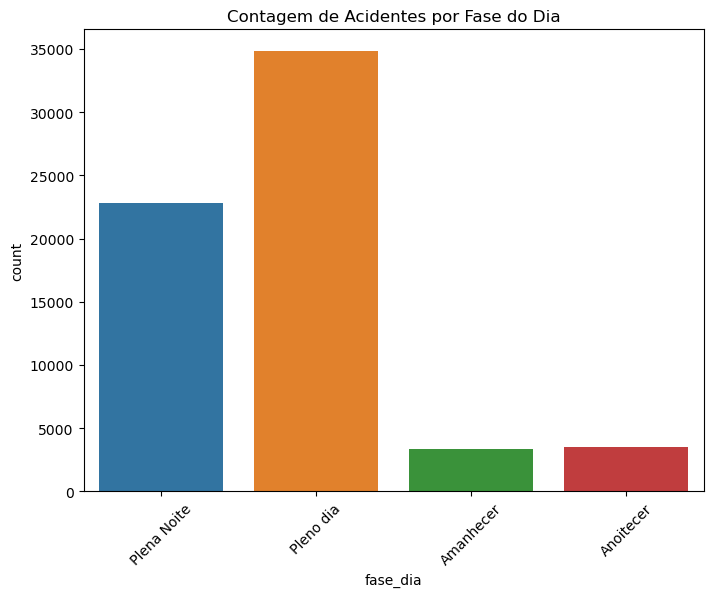

In [16]:
# Criando um gráfico de barras das contagens

plt.figure(figsize=(8, 6))
sns.countplot(data=dados, x='fase_dia')
plt.title('Contagem de Acidentes por Fase do Dia')
plt.xticks(rotation=45)  # Rotação dos rótulos do eixo x para melhor legibilidade
plt.show()


In [14]:
RodoviaCount = dados['br'].value_counts()
display(RodoviaCount)

br
101.0    10754
116.0     9822
40.0      3122
381.0     3038
153.0     2461
         ...  
437.0        1
342.0        1
434.0        1
265.0        1
422.0        1
Name: count, Length: 116, dtype: int64

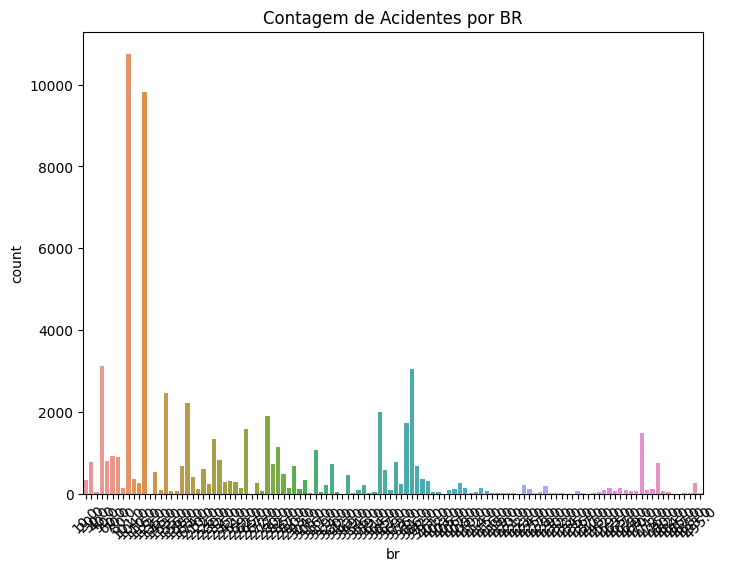

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dados, x='br')
plt.title('Contagem de Acidentes por BR')
plt.xticks(rotation=45)  # Rotação dos rótulos do eixo x para melhor legibilidade
plt.show()

É interessante pensar algo, quando vimos estes dados podemos até ficar assustados, mas com uma breve analise podemos ver que, a br 101 é a segunda maior BR do país, o que explica a altissima taxa de acidentes.

Contagens de acidente por dia da semana

In [16]:
DiaDaSemanaCount = dados['dia_semana'].value_counts()
display(DiaDaSemanaCount)

dia_semana
domingo          10969
sábado           10928
sexta-feira       9935
segunda-feira     8818
quinta-feira      8189
quarta-feira      7946
terça-feira       7762
Name: count, dtype: int64

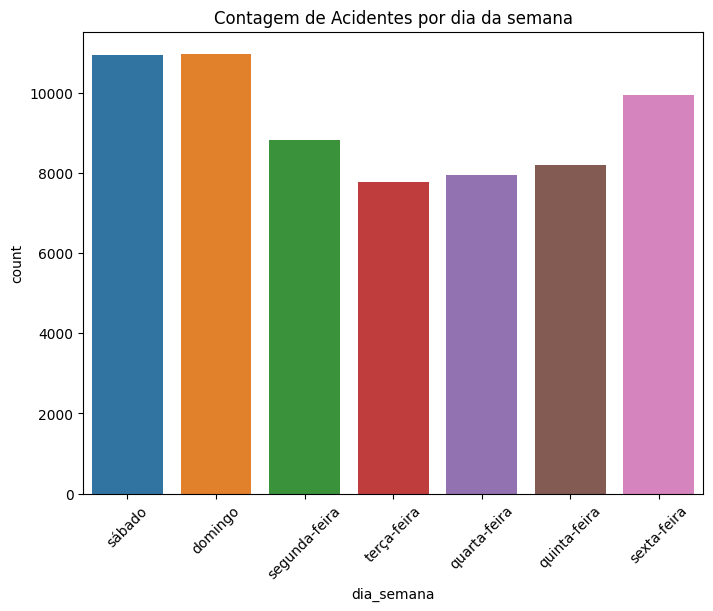

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dados, x='dia_semana')
plt.title('Contagem de Acidentes por dia da semana')
plt.xticks(rotation=45)  # Rotação dos rótulos do eixo x para melhor legibilidade
plt.show()

Correlacao entre consumo de alcool e gravidade do acidente.

In [18]:
quantidade_ocorrencias = ((dados['causa_acidente'].str.contains('Ingestão de álcool pelo condutor', case=False)) & (dados['classificacao_acidente'].str.contains('Com Vítimas Fatais', case=False))).sum()

# Imprima o resultado
print(f'Quantidade de linhas em que "Ingestao de alcool" e "Com Vítimas Fatais" aparecem juntas: {quantidade_ocorrencias}')


Quantidade de linhas em que "Ingestao de alcool" e "Com Vítimas Fatais" aparecem juntas: 176


Qual é o acidente mais recorrente

In [20]:
contagem_motivos = dados.groupby('causa_acidente')['classificacao_acidente'].value_counts()
print(contagem_motivos)

causa_acidente                                                                classificacao_acidente
Acessar a via sem observar a presença dos outros veículos                     Com Vítimas Feridas       4667
                                                                              Sem Vítimas                592
                                                                              Com Vítimas Fatais         323
Acesso irregular                                                              Com Vítimas Feridas        538
                                                                              Sem Vítimas                 83
                                                                                                        ... 
Velocidade Incompatível                                                       Sem Vítimas                851
                                                                              Com Vítimas Fatais         410
Área urbana sem a presença 

Qual acidente é o mais recorrente para cada tipo de pista

In [23]:
contagem_pista = dados.groupby('tipo_pista')['classificacao_acidente'].value_counts()
print(contagem_pista)

tipo_pista  classificacao_acidente
Dupla       Com Vítimas Feridas       20452
            Sem Vítimas                5091
            Com Vítimas Fatais         1252
Múltipla    Com Vítimas Feridas        4550
            Sem Vítimas                 993
            Com Vítimas Fatais          243
Simples     Com Vítimas Feridas       23375
            Sem Vítimas                5424
            Com Vítimas Fatais         3167
Name: count, dtype: int64
